In [3]:
import imageio
# from scipy.misc import imread, imresize
import cv2
import matplotlib.pyplot as plt

Both of these methods will read the image into a NumPy array, but the array returned by opencv will be in BGR color format by default, 

while the array returned by imageio will be in RGB format.

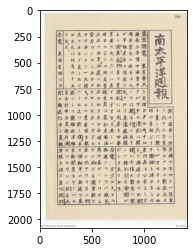

In [4]:
img = imageio.imread('Jap_hw/g1/J61.jfif')
img_cropped = imageio.imread('Jap_hw/g1/J61_cropped.jfif')

plt.imshow(img)

# Displaying the image

In [16]:
import os
import torch
from torchvision import datasets, transforms
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        self.data = []
        self.targets = []
        for filename in os.listdir(data_dir):
            # label_dir = os.path.join(data_dir, label)
            # for filename in os.listdir(label_dir):
            self.data.append(os.path.join(filename))
            self.targets.append(filename[:3])
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_path = self.data[index]
        target = self.targets[index]
        with open(image_path, 'rb') as f:
            image = Image.open(f).convert('L')
        image = self.transform(image)
        return image, target

# Define the path to your image data
data_dir = 'CERUG_dataset/Task1/'

# Define the transformations to be applied to the images
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
])

# Use the custom dataset class to load the data
train_data = CustomDataset(os.path.join(data_dir, 'Task1_Training'), transform)

test_data = CustomDataset(os.path.join(data_dir, 'Task1_Validation/Training'), transform)

# Define the dataloaders to iterate over the data in batches
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

# # Example usage
# for images, labels in train_loader:
#     # Your code here
#     pass


In [17]:
classes = len(train_data.targets)
print(classes)

80
